# WSI LAB07 Klasyfikator Bayes'a


### Miłosz Cieśla 325154 <br>

### Cele eksperymentu

- Sprawdzenie poprawności implementacji algorytmu naiwnego klasyfikatora
Bayesa.
- Zbadanie jakości za pomocą podziału na zbiór trenujący, walidacyjny i testowy.
- Zbadanie jakości za pomocą k-krotnej walidacji krzyżowej.

### Potrzebne importy

In [2]:
from mySolver import MySolver
from testingUtils import readCSV, compareAccuracy, pltAcc, getCrossValData, getValData
import pandas as pd
import numpy as np
X, Y = readCSV("cardio_train.csv")

### Poprawność algorytmu:
Aby ustalić czy moja implementacja jest poprawna, porównuje średnie wyniki uzyskane z 50 cykli treningowych po których następuje przewidywanie.

In [15]:

meanMS, meanSK, stdMS, stdSK = compareAccuracy(X, Y, 50, 0.3)
data = {
    '': ['Mean', 'Standard Deviation'],
    'MySolver': [meanMS, stdMS],
    'skLearn': [meanSK, stdSK]
}
df = pd.DataFrame(data)
df

,,MySolver,skLearn
0,Mean,59.273051,59.261796
1,Standard Deviation,0.759196,0.772759


Jak możemy zauważyć wyniki są do siebie bardzo zbliżone. Co potwierdza, że algorytm działa w zamierzony sposób.

### Badanie jakości za pomocą k-krotnej walidacji krzyżowej 

W tym eksperymencie uruchamiam, walidację krzyżową dla róznych parametrów k. Używam do tego funkcji cross_val_score dostarczonej przez bibliotekę sklearn.  Aby uzyskać miarodajne porównanie, uruchamiam pomiary 10 razy i podaje wyniki będące ich średnią.

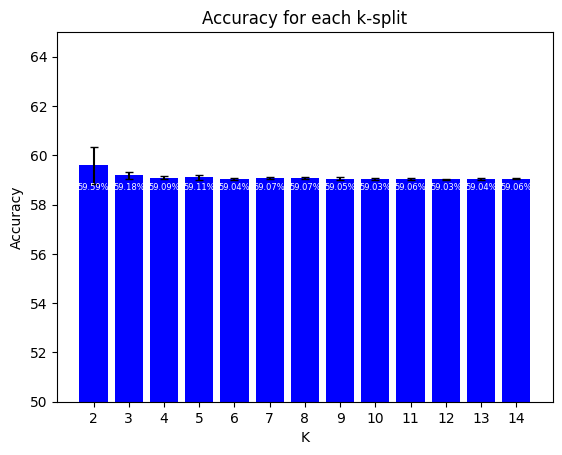

In [3]:
data = getCrossValData(X, Y, 15, 10)
pltAcc([i + 2 for i in range(len(data))], data, "Accuracy for each k-split", "K", "Accuracy")

Jak widzimy, dla k>=6 wszystkie pomiary zwracają niemalże ten sam wynik, posiadają również niskie odchylenie standardowe. Świadczy to o skuteczności tej metody.

### Badanie jakości za pomocą podziału na zbiór trenujący i testowy

Do tego eksperymentu wykorzystałem funkcję do podziału danych train_test_split dostępną w sklearn. Następnie dla różnych parametrów(0.1, 0.2 ... 0.9) odpowiedzialnych za rozmiar zbiorów testowych, mierzę dokładność wyników. Na wykresie przedstawione są średnie wyniki z 50 iteracji tego eksperymentu dla każdego parametru "test_size". 

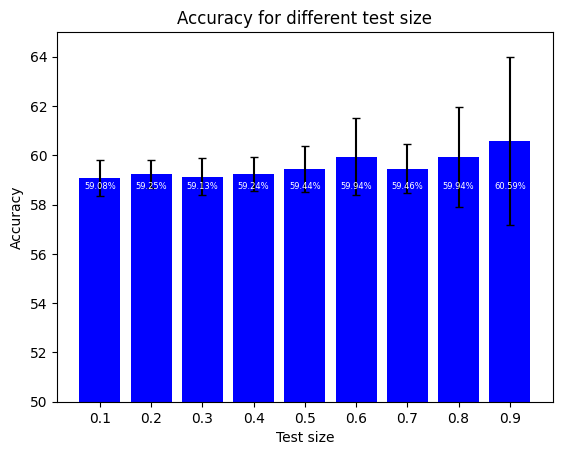

In [4]:
splits = np.arange(0.1, 1.0, 0.1)
data = getValData(X, Y, splits, 50)
pltAcc(splits, data, "Accuracy for different test size", "Test size", "Accuracy")

Jak możemy zauważyć testowanie za pomocą podziału na zbiór trenujący i testowy daje nam wyniki o większym odchyleniu standardowym. Co świadczy, że mimo poprawności tej metody daje nam ona mniej dokładne wyniki w pojedynczych wywołaniach niż poprzedni eksperyment.

### Podsumowanie

Klasyfikator Bayes'a jest bardzo intuicyjnym oraz prostym w implementacji algorytmem. Nie wymaga od nas dodatkowych hiperparametrów, umożliwiając pominięcie etapu walidacji. Ponadto, warto zauważyć szybkość z jaką jest w stanie się nauczyć na zadanym zbiorze.
Niestety wymaga on, dobrze dobranych danych do jego możliwości(nie dokładny dla zbioru cardio-vascular-disease-detection), w przeciwnym wypadku wykazuje się niską skutecznością.